# Korean Drama Analysis
Dataset as of 2021/12
From Kaggle: https://www.kaggle.com/chanoncharuchinda/top-100-korean-drama-mydramalist

In [1]:
# Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import re # Regex
import seaborn as sns

In [59]:
df = pd.read_csv("top100_kdrama.csv")
df.shape
df.head(10)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
6,Reply 1988,2015,"Nov 6, 2015 - Jan 16, 2016","Friday, Saturday",20,tvN,1 hr. 40 min.,15+ - Teens 15 or older,"Five childhood friends, who all live in the sa...","Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...",#7,9.0
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0
8,Mr. Queen,2020,"Dec 12, 2020 - Feb 14, 2021","Saturday, Sunday",20,tvN,1 hr. 20 min.,15+ - Teens 15 or older,Jang Bong Hwan is a South Korean chef who has ...,"Shin Hye Sun, Kim Jung Hyun, Bae Jong Ok, Kim ...","Historical, Mystery, Comedy, Romance","Smart Male Lead, Transmigration, Calm Male Lea...",#9,9.0
9,Mother,2018,"Jan 24, 2018 - Mar 15, 2018","Wednesday, Thursday",16,tvN,1 hr. 3 min.,15+ - Teens 15 or older,"Realizing one of her students is being abused,...","Lee Bo Young, Heo Yool, Lee Hye Young, Go Sung...","Thriller, Mystery, Psychological, Melodrama","Mother-Daughter Relationship, Independent Fema...",#10,9.0


Column Names:
* Name
* Year of release
* Aired Date
* Aired On
* Number of Episode
* Network
* Duration
* Content Rating
* Synopsis
* Cast
* Genre
* Tags
* Rank
* Rating

## Introduction
Goals of this project:
* Familiarize with data visualization using Python
* Familiarize with data analysis packages (Pandas)
* Practice NLP

Bias in the dataset:
* Lack of number of users who rated the movie title
* Genre vs Tags

Based on this dataset, I'd like to answer 3 questions below:
1. What are the characteristics of high-rated dramas?
2. What are the characteristics of low-rated dramas?
3. How can we use this data to improve drama production?


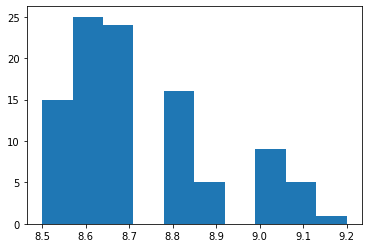

In [11]:
# Before delving in, it's important to get a better understanding more about the drama performance metric
# Here it's rating,
desc_stats = df["Rating"].describe() # Shows descriptive statistics of the Rating column
# Noticed that the lowest score is only 8.5, highest is 9.2 -- and 8.7 is the mean

# Let's try to take a look at the distribution
rating_dist = plt.hist(df["Rating"]) # Histogram for rating plot
# Noticed that distribution is skewed to the left, which makes sense since this only includes the top 100 dramas
    # However, this indicates a posibility that there could be a normal distribution if we have all of the dramas available

Based on the histogram chart in the block above, we notice that majority of the data is skewed around the mean, which is 8.6-8.7. Thus, we can divide the titles into two groups, titles with ratings >8.8 and titles with ratings <8.8. Since we consider the top-rated dramas to be different from those closer to the mean.

In [60]:
# Data Preparation

### Convert Duration into minutes
df["Duration_mins"] = df["Duration"].str.replace("min.", "") # minutes column
df["Duration_hr"] = df["Duration_mins"].str.replace("1 hr.", "60")
df["Duration_mins"] = df["Duration_mins"].str.replace("1 hr.", "")
df.loc[df['Duration_hr'].str.contains('60'), ['Duration_hr']] = ['60']
df.loc[~df['Duration'].str.contains('hr.'), ['Duration_hr']] = ['0'] # create hour column
df[["Duration_mins", "Duration_hr"]] = df[["Duration_mins", "Duration_hr"]].astype("int")
df["Duration_min"] = df["Duration_mins"] + df["Duration_hr"]
# df = df.drop(columns = ["Duration_mins", "Duration_hr", "Duration"])
## Create Groups

### Group Content rating into 15+, 18+ (Restricted - violence & profanity), 13+ 
df["Content Rating"].value_counts() # To check unique groups
# 15+ - Teens 15 or older
# 18+ Restricted (violence & profanity)
# 13+ - Teens 13 or older
df["content_rating"] = df["Content Rating"]
df.loc[df['Content Rating'].str.contains("15+"), ['content_rating']] = ["15+"]
df.loc[df['Content Rating'].str.contains("18+", regex = True), ['content_rating']] = ["18+"]
df.loc[df['Content Rating'].str.contains("13+", regex = True), ['content_rating']] = ["13+"]
df = df.drop(columns = ["Content Rating"])


### Transform Network
df["Network"].value_counts()
# Noticed that since most of the dramas are produced by Korean TV channels, we can make a separate a new column to indicate netflix's participation
df["Netflix"] = df["Network"]
df.loc[df['Network'].str.contains("Netflix"), ['Netflix']] = ["1"]
df.loc[~df['Network'].str.contains("Netflix"), ['Netflix']] = ["0"]
df["Netflix"] = df["Netflix"].astype("int")
# Also noticed that Viki also co-produced some dramas
df["Viki"] = df["Network"]
df.loc[df['Network'].str.contains("Viki"), ['Viki']] = ["1"]
df.loc[~df['Network'].str.contains("Viki"), ['Viki']] = ["0"]
df["Viki"] = df["Viki"].astype("int")

df["network_kr"] = df["Network"]
df.loc[df['network_kr'] == "Netflix ", ['network_kr']] = ["None"]
df["network_kr"] = df["network_kr"].str.replace("Netflix,  ", "")
df["network_kr"] = df["network_kr"].str.replace(",  Netflix", "")
df["network_kr"] = df["network_kr"].str.replace(",  Viki", "")
df = df.drop(columns = ["Network"])


### Add another column with value 1 for ease of data visualization
df["sum"] = 1

df.head()

# dftest = df.loc[df['network_kr'] == "Netflix "]
# dftest.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Duration,Synopsis,Cast,Genre,Tags,Rank,Rating,Duration_mins,Duration_hr,Duration_min,content_rating,Netflix,Viki,network_kr,sum
0,Move to Heaven,2021,"May 14, 2021",Friday,10,52 min.,Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2,52,0,52,18+,1,0,None,1
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,1 hr. 30 min.,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1,30,60,90,15+,1,0,tvN,1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,1 hr. 10 min.,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1,10,60,70,15+,0,0,tvN,1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,1 hr. 40 min.,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1,40,60,100,15+,1,0,tvN,1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,1 hr. 17 min.,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1,17,60,77,15+,0,0,tvN,1


In [61]:
# Splitting df to high & low
dfh = pd.DataFrame(df.loc[df["Rating"] >= 8.8]) # 36 titles
dfl = pd.DataFrame(df.loc[df["Rating"] < 8.8]) # 64 titles
dfl.shape

# Although they are not balanced, it makes sense for number of high-rated dramas to be less than lower-rated
# because otherwise all kdramas will be high-rated (which I totally agree with, but that's just not realistic)

(64, 20)

### 1. What are the characteristics of high-rated dramas?
To tackle this question, we will be taking a look at the filtered dataframe "dfh" with 36 titles. Here are some of the process that I will go through to figure out how best to tackle this. I'd like to check a few factors below:
* Network distribution (percentage of each networks)
* Year of release distribution
* Duration 
* Content Rating
* Number of Episodes

Before delving into the story itself, let's take a look into the external factors

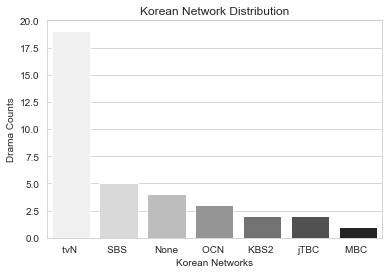

In [62]:
## VISUALIZATION

# Network Distribution (Korean version)
sns.set_style("whitegrid")
nd = sns.countplot(x = "network_kr", data = dfh, palette = "Greys", order=dfh["network_kr"].value_counts().index)
nd = nd.set(ylim = (0, 20))
nd = plt.title("Korean Network Distribution")
nd = plt.xlabel("Korean Networks")
nd = plt.ylabel("Drama Counts")


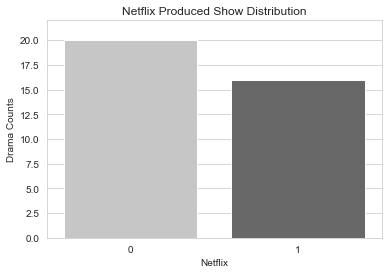

In [63]:
# Network Distribution (Netflix)
net = sns.countplot(x = "Netflix", data = dfh, palette = "Greys", order= dfh["Netflix"].value_counts().index)
net = net.set(ylim = (0, 22))
net = plt.title("Netflix Produced Show Distribution")
net = plt.xlabel("Netflix")
net = plt.ylabel("Drama Counts")


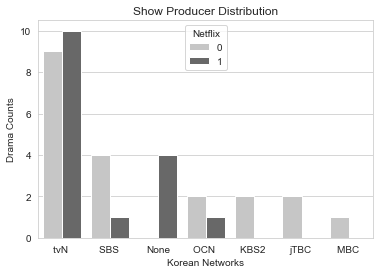

In [64]:
# Netflix with Korean Networks
sns.countplot(x="network_kr", hue = "Netflix", data = dfh, palette = "Greys", order= dfh["network_kr"].value_counts().index)
netx = plt.title("Show Producer Distribution")
netx = plt.xlabel("Korean Networks")
netx = plt.ylabel("Drama Counts")

# Notes
# dfh["network_kr"].value_counts() ## use a pie chart
# dfh["Netflix"].value_counts() ## use a pie chart
# Noticed that almost half of the high-rated dramas are either produced or co-produced by netflix 
    # 4 of 16 netflix production is solo-produced by Netflix
    #!!! Netflix produced shows beats Korean network only produced shows
# More than half of high-rated dramas are produced by tvN
# More than half of tvN produced dramas --> co-produced by Netflix
# Netflix seems to partner mostly with tvN
### Maybe can take a look into specific titles later on

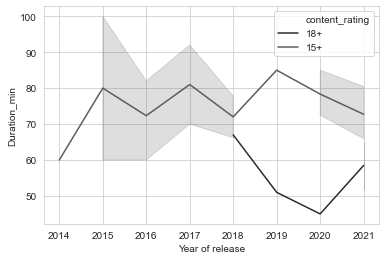

In [105]:
## USELESS RIGHT NOW
# Year of Release paired with content rating
# sns.countplot(x="Year of release", data = dfh, palette = "Greys", order= dfh["Year of release"].value_counts().index)
# df1 = dfh.groupby('Year of release', as_index = False)["sum"].agg(['sum', 'count'])
sns.set_palette("Greys_r")
sns.lineplot(x = "Year of release", y = "Duration_min", hue = "content_rating", data = dfh)
# df1.head(10)

# Notes
## Duration increased dramatically in 2015, then continued to stay for content rating 15+ -- >70 mins range
## For content rating 18+, the duration decreases slightly, and stays at 60 mins range

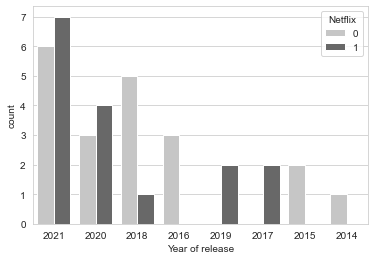

In [55]:
# Year of Release -- figure out how to convert to line plot
sns.countplot(x="Year of release", hue = "Netflix", data = dfh, palette = "Greys", order= dfh["Year of release"].value_counts().index)
# Year of release distribution
# dfh["Year of release"].value_counts()
# More than half of the high-rated dramas are released in the past 2 years (2021, 2020)
### Possibly due to the surge of accessibility to Kdrama content thanks to Netflix --> higher ratings?
### but older dramas (2018 & 2016) are still following the dramas produced in 2021 & 2020
### Need to test hypothesis by checking the number of raters via website

72.0

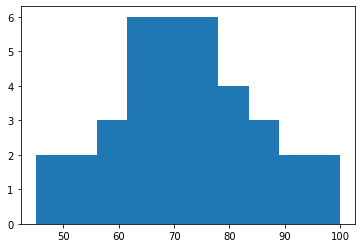

In [211]:
## Analysis notes:
# Duration
duration_hist = plt.hist(dfh["Duration_min"]) # Distribution looks normal
dfh["Duration_min"].value_counts().sort_index()
round(dfh["Duration_min"].mean(),0)
# dfh["Duration_min"].describe()
# Average duration is 72 minutes, which is about normal considering recent shows have a longer episode duration
####


# Content Rating
# dfh["content_rating"].value_counts()
# Majority are with the 15+ label --> possibly indicating that users who rated dramas are in the teens range


# Number of Episodes
# dfh["Number of Episode"].value_counts()
# round(dfh["Number of Episode"].mean(),0)
# Average number of episodes is 15, which reflects the mode of the data (16 episodes, the usual number of kdrama episodes)
# dfh_mov.head()

### 2. What are the characteristics of lower-rated dramas?


21.0

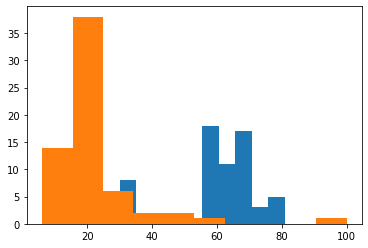

In [229]:
# Network Distribution
dfl["network_kr"].value_counts() ## use a pie chart
dfl["Netflix"].value_counts() ## use a pie chart
dfl["Viki"].value_counts()
# tvN is still high up, but followed by SBS, jtbc (tvn is less than half of the count)
# Majority of dramas are not produced/co-produced by Netflix
# 1 drama produced by Viki
### Maybe can take a look into specific titles later on

# Year of release distribution
dfl["Year of release"].value_counts()
# Majority of low-rated dramas are released > 2 years ago
### Before Netflix originals (CLOTY, Itaewon Class, etc) exploded
### Again, need to test hypothesis by checking the number of raters via website


# Duration
lduration_hist = plt.hist(dfl["Duration_min"]) # Distribution looks kind of normal
dfl["Duration_min"].value_counts().sort_index()
round(dfl["Duration_min"].mean(),0)
# dfh["Duration_min"].describe()
# Average duration is 62 minutes, which is still an average episode length --> probably affected by the shorter web drama episodes
#### Indicates that web dramas could be in this category (30 minutes)


# Content Rating
dfl["content_rating"].value_counts()
# Majority are with the 15+ label --> possibly indicating that users who rated dramas are in the teens range
# Also included 13+ dramas as well


# Number of Episodes
dfl["Number of Episode"].value_counts()
epnum = plt.hist(dfl["Number of Episode"]) # orange
dfl["Number of Episode"].describe()
round(dfl["Number of Episode"].mean(),0)
# Average number of episodes is 21, which reflects the mode of the data (20 episodes), a little longer than the usual episodes
### But this also includes drama with 40, 50, 60, 100 episodes
### May affect the lower ratings due to people getting bored, or lesser users watched -- NEED TO CROSS CHECK
# dfh_mov.head()

### 3. How can we use this data to improve drama production?